In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

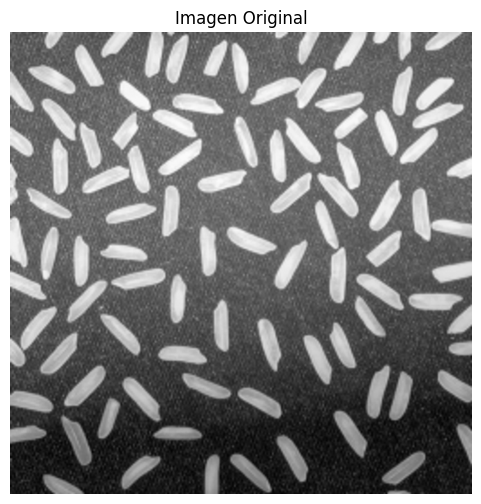

In [124]:
img = cv2.imread('./rice.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró 'rice.jpg'. Asegúrate de que el archivo está en el directorio de trabajo.")

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

In [125]:
blurred = cv2.GaussianBlur(img, (5,5), 0)

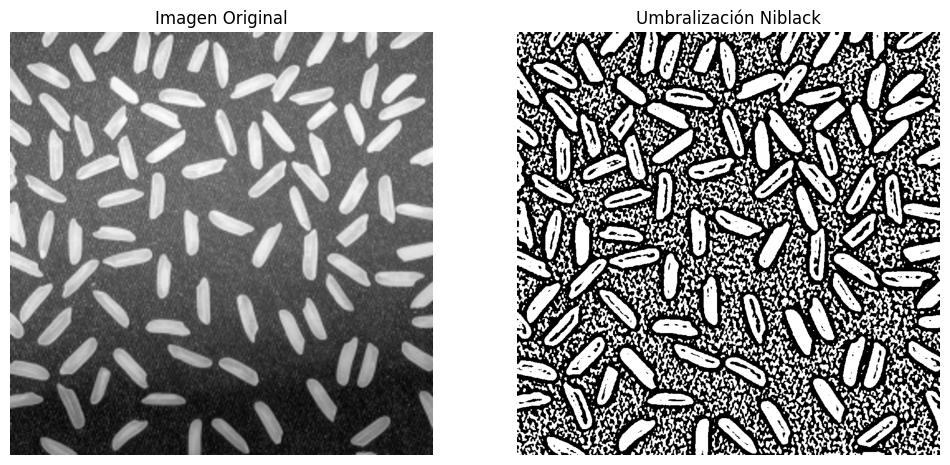

In [ ]:
from skimage.filters import threshold_niblack

blurred_norm = blurred.astype("float32") / 255.0

thresh_niblack = threshold_niblack(blurred_norm, window_size=17, k=0.05)
binary_niblack = ((blurred_norm > thresh_niblack) * 255).astype("uint8")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_niblack, cmap='gray')
plt.title('Umbralización Niblack')
plt.axis('off')


plt.show()

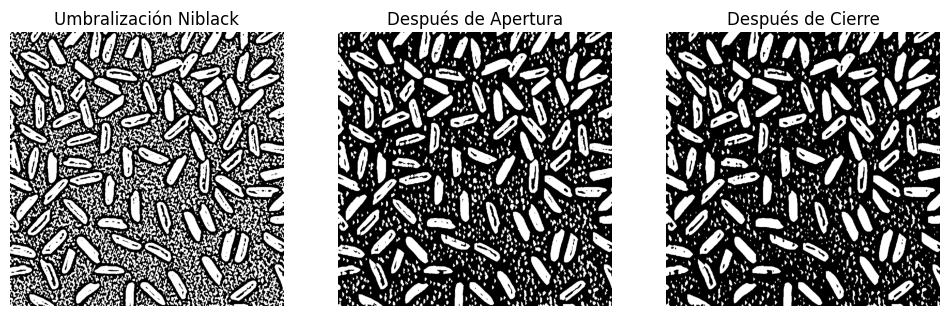

In [138]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 3))

opening = cv2.morphologyEx(binary_niblack, cv2.MORPH_OPEN, kernel, iterations=4)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_niblack, cmap='gray')
plt.title('Umbralización Niblack')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Después de Apertura')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Después de Cierre')
plt.axis('off')

plt.show()



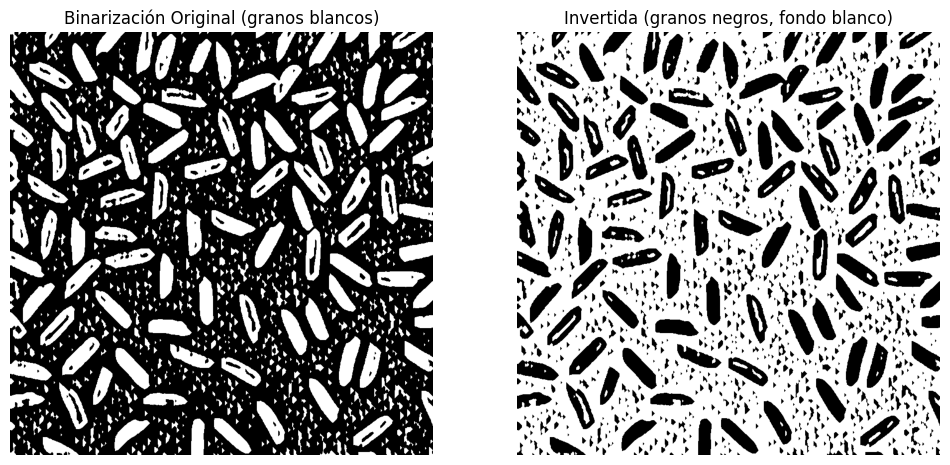

In [139]:
inverted = cv2.bitwise_not(closing)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(closing, cmap='gray')
plt.title("Binarización Original (granos blancos)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(inverted, cmap='gray')
plt.title("Invertida (granos negros, fondo blanco)")
plt.axis("off")
plt.show()


In [140]:
def remove_small_black_objects(binary_img, min_size=50):
    inv = cv2.bitwise_not(binary_img)

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(inv, connectivity=8)

    cleaned_inv = inv.copy()
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area < min_size:
            cleaned_inv[labels == i] = 0

    cleaned = cv2.bitwise_not(cleaned_inv)
    return cleaned


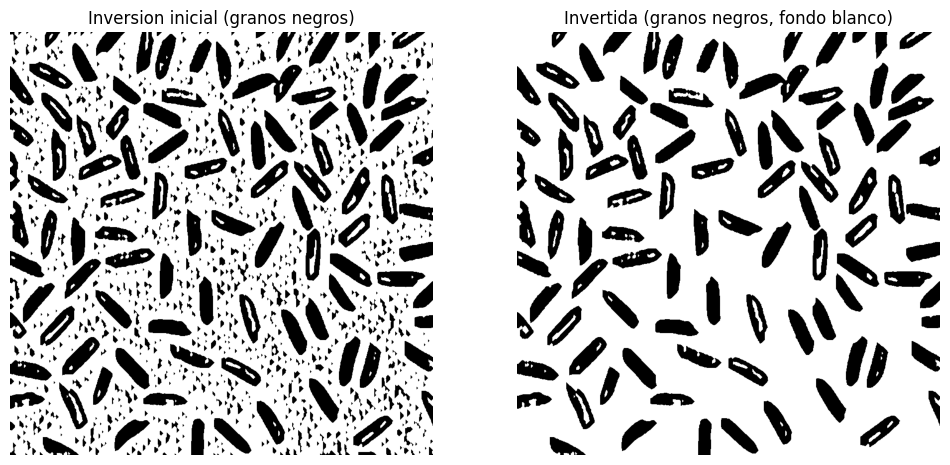

In [141]:
cleaned_black = remove_small_black_objects(inverted, min_size=400)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(inverted, cmap='gray')
plt.title("Inversion inicial (granos negros)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cleaned_black, cmap='gray')
plt.title("Invertida (granos negros, fondo blanco)")
plt.axis("off")
plt.show()



Número de granos de arroz detectados: 97


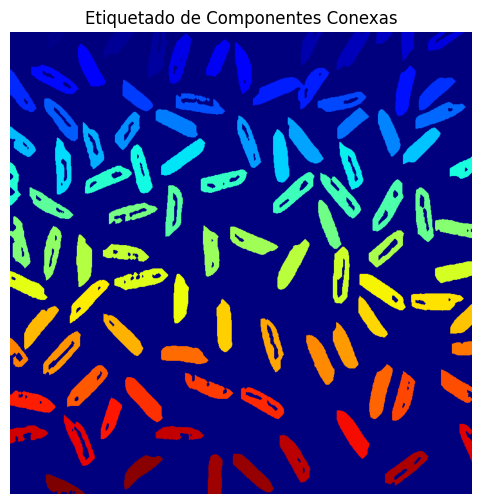

In [142]:
final_inverted = cv2.bitwise_not(cleaned_black)
num_labels, labels = cv2.connectedComponents(final_inverted)

num_grains = num_labels - 1
print("Número de granos de arroz detectados:", num_grains)

plt.figure(figsize=(6, 6))
plt.imshow(labels, cmap='jet')
plt.title('Etiquetado de Componentes Conexas')
plt.axis('off')
plt.show()
